<a href="https://colab.research.google.com/github/rkanejac/Data110/blob/main/RalinkaeWeek7HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Data Exploration
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#loading the dataset using seaborn's load_dataset function
penguins = sns.load_dataset("penguins")

#displaying the first 10 rows
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [43]:
#grabbing statistical summary
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [44]:
#Data Filtering
four_thnd_grams = penguins[penguins['body_mass_g']>4000]
four_thnd_grams.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male


In [45]:
#Conditional Filtering
penguins[((penguins['bill_length_mm']>40) & (penguins['bill_length_mm']<50))&(penguins['bill_depth_mm']<18)].shape


(129, 7)

In [114]:
#Data Grouping and Aggregation

#group dataset by species and island
spec_island_group = penguins.groupby(['species','island'])['flipper_length_mm'].mean().sort_values(ascending=False).reset_index(name='Average')
print(spec_island_group)


     species     island     Average
0     Gentoo     Biscoe  217.186992
1  Chinstrap      Dream  195.823529
2     Adelie  Torgersen  191.196078
3     Adelie      Dream  189.732143
4     Adelie     Biscoe  188.795455


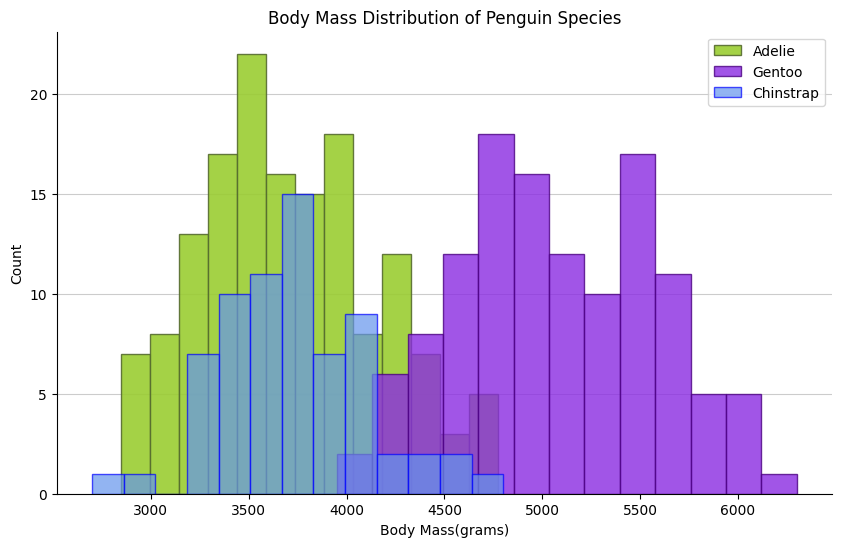

In [97]:
#Advanced Visualization: Part 1
gentoo = penguins[penguins['species']=='Gentoo']
chinstrap = penguins[penguins['species']=='Chinstrap']
adelie = penguins[penguins['species']=='Adelie']

plt.figure(figsize=(10,6))
plt.hist(adelie['body_mass_g'], bins=13, color='yellowgreen', label='Adelie', edgecolor='darkolivegreen', alpha = 0.9)
plt.hist(gentoo['body_mass_g'], bins=13, color='blueviolet', label='Gentoo', edgecolor='indigo', alpha=0.8)
plt.hist(chinstrap['body_mass_g'], bins=13, color='cornflowerblue', label='Chinstrap', edgecolor='blue', alpha=0.7)
plt.legend()
plt.ylabel('Count')
plt.xlabel('Body Mass(grams)')
plt.title('Body Mass Distribution of Penguin Species')
ax = plt.gca()
ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_axisbelow(True)
plt.grid(axis='y', color='black', alpha=0.2)
plt.show()


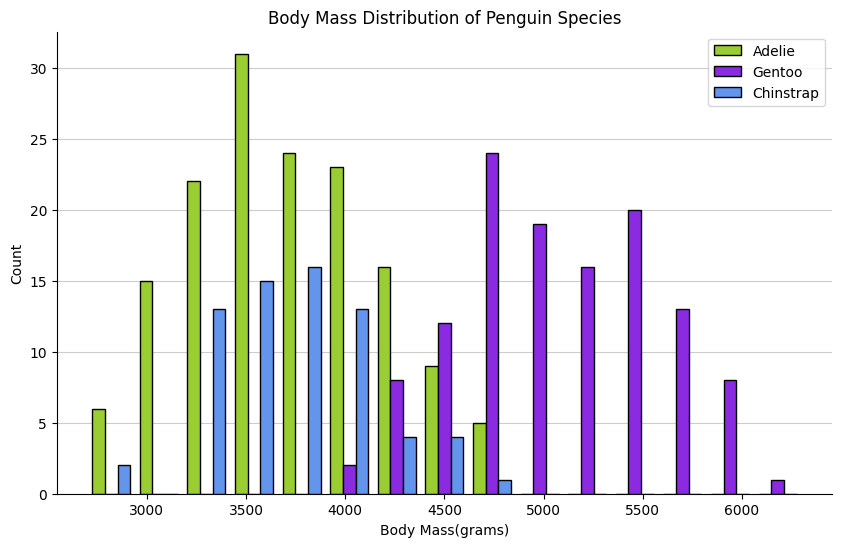

In [117]:
#Advanced Visualization: Part 2 (trying to experiment with creating a histogram with one line)
x = [adelie['body_mass_g'], gentoo['body_mass_g'], chinstrap['body_mass_g'] ]
color1 = ['yellowgreen', 'blueviolet', 'cornflowerblue']
labels = ['Adelie','Gentoo', 'Chinstrap']

plt.figure(figsize=(10,6))
plt.hist(x, bins=15, rwidth=0.8, color=color1, edgecolor='black', label=labels)
plt.legend()
plt.ylabel('Count')
plt.xlabel('Body Mass(grams)')
plt.title('Body Mass Distribution of Penguin Species')
ax = plt.gca()
ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_axisbelow(True)
plt.grid(axis='y', color='black', alpha=0.2)
plt.show()


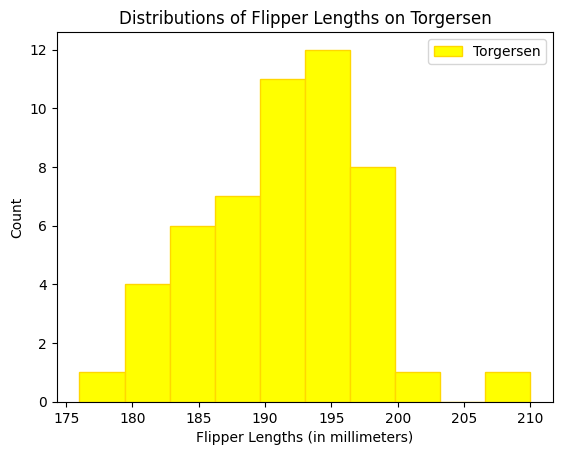

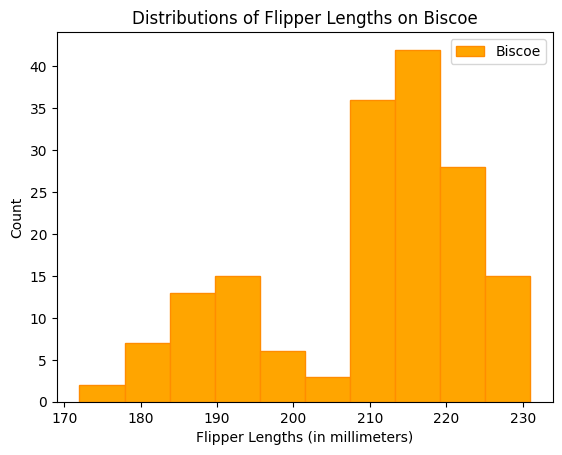

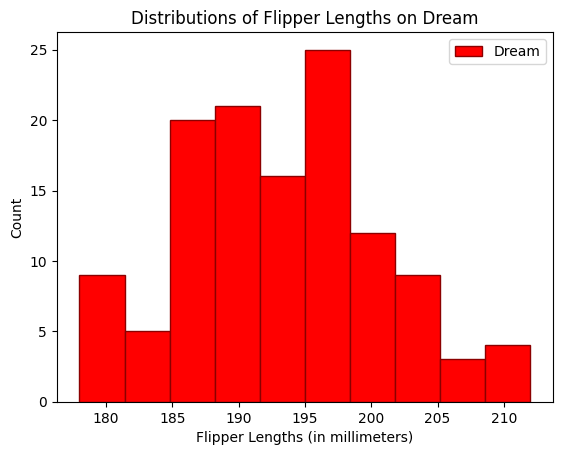

In [132]:
#Utilizing Loops for Visualization
islands = penguins['island'].unique()
colors = ['yellow','orange','red']
edges = ['gold', 'darkorange', 'darkred']


for island, color1, edge in zip(islands, colors, edges):
  subset = penguins[penguins['island']==island]
  plt.figure()
  plt.hist(subset['flipper_length_mm'], label=island, bins = 10, color=color1, edgecolor=edge)
  plt.legend()
  plt.title('Distributions of Flipper Lengths on '+ island)
  plt.xlabel('Flipper Lengths (in millimeters)')
  plt.ylabel('Count')